This notebook was adapted from the blog post here: https://medium.com/@jsflo.dev/training-a-tensorflow-model-to-recognize-emotions-a20c3bcd6468

In [2]:
import pandas as pd

raw_data_file_name = "../dataset/fer2013.csv"
raw_data = pd.read_csv(raw_data_file_name)

What does this data look like?

In [3]:
raw_data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


So the data has three columns:

1. `emotion`: this column contains the pre-filled emotion determination for training
2. `pixels`: this column has the actual image data
3. `Usage`: this column splits the data into three parts: `Training`, `PrivateTest`, and `PublicTest`

Let's look at how many of each there are.

In [4]:
raw_data["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

Next we'll take a look at some of the images in the dataset.

First, we load the data in the first image into a vector.

In [5]:
import numpy as np

img = raw_data["pixels"][0]
val = img.split(' ')

Then, we'll convert that to a numpy array of floats, normalizing each value by the maximum of 255.

In [6]:
img_pixels = np.array(val, 'float32')
img_pixels /= 255
print(img_pixels)

[0.27450982 0.3137255  0.32156864 ... 0.41568628 0.42745098 0.32156864]


Finally, we can convert that 1x2304 array into a 48x48 array, matching the original image.

In [7]:
img_reshaped = img_pixels.reshape(48, 48)
print(img_reshaped)

[[0.27450982 0.3137255  0.32156864 ... 0.20392157 0.16862746 0.16078432]
 [0.25490198 0.23921569 0.22745098 ... 0.21960784 0.20392157 0.17254902]
 [0.19607843 0.16862746 0.21176471 ... 0.19215687 0.21960784 0.18431373]
 ...
 [0.35686275 0.25490198 0.16470589 ... 0.28235295 0.21960784 0.16862746]
 [0.3019608  0.32156864 0.30980393 ... 0.4117647  0.27450982 0.18039216]
 [0.3019608  0.28235295 0.32941177 ... 0.41568628 0.42745098 0.32156864]]


Still, our image isn't very recognizable. Let's convert it into that data that we're used to reading: brightness.

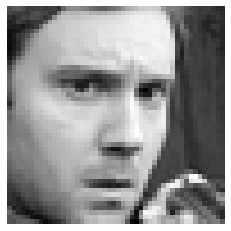

In [8]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plot

plot.imshow(img_reshaped, cmap= "gray", interpolation="nearest")
plot.axis("off")
plot.show()

Perfect! So we're able to extract images from the dataset.